In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')

In [3]:
df.head(3)

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y


In [4]:
def spam_to_num(value):
    if value=='y': return 1
    else: return 0

In [5]:
df['spam'] = df['yesno'].apply(lambda x: spam_to_num(x))

In [6]:
df.drop(['Unnamed: 0', 'yesno'], axis=1, inplace=True)

In [7]:
df.head(3)

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1


In [8]:
X = df.drop(['spam'], axis=1)
y = df['spam']

for i in df.drop(['spam'], axis=1): 
    for j in df.drop(['spam'], axis=1):
        if ((i!=j) and ((j+'_'+i) not in X)):
            X[i+'_'+j]=df.drop(['spam'], axis=1)[i]*df.drop(['spam'], axis=1)[j]

In [9]:
X

,crl.tot,dollar,bang,money,n000,make,crl.tot_dollar,crl.tot_bang,crl.tot_money,crl.tot_n000,...,dollar_bang,dollar_money,dollar_n000,dollar_make,bang_money,bang_n000,bang_make,money_n000,money_make,n000_make
0,278,0.000,0.778,0.00,0.00,0.00,0.000,216.284,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,185.040,382.416,442.04,442.04,...,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,415.656,623.484,135.54,2620.44,...,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,0.000,26.167,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191,0.000,0.135,0.00,0.00,0.00,0.000,25.785,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,88,0.000,0.000,0.00,0.00,0.31,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4597,14,0.000,0.353,0.00,0.00,0.00,0.000,4.942,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4598,118,0.000,0.000,0.00,0.00,0.30,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4599,78,0.000,0.000,0.00,0.00,0.96,0.000,0.000,0.00,0.00,...,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, Length: 4601, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
GBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
                                 min_samples_leaf=1, subsample=1,max_features=None, random_state=42)

In [13]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42, subsample=1)

In [14]:
y_pred = GBC.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.8653637350705755

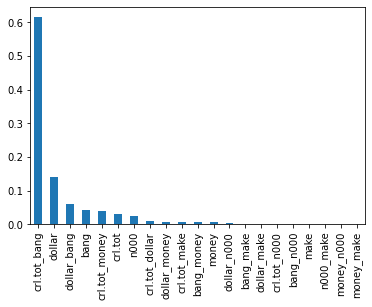

In [16]:
pd.Series(GBC.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')

In [17]:
X.columns

Index(['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make', 'crl.tot_dollar',
       'crl.tot_bang', 'crl.tot_money', 'crl.tot_n000', 'crl.tot_make',
       'dollar_bang', 'dollar_money', 'dollar_n000', 'dollar_make',
       'bang_money', 'bang_n000', 'bang_make', 'money_n000', 'money_make',
       'n000_make'],
      dtype='object')

In [18]:
parameters  = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}

GS = GridSearchCV(GBC, parameters, scoring='accuracy', n_jobs=-1, cv=5)

In [19]:
GS.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(random_state=42, subsample=1),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [20]:
GS.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1250,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [21]:
GS.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250,
                           random_state=42, subsample=1)

In [22]:
y_pred = GS.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.8642779587404995

In [24]:
GS.score(X_test, y_test)

0.8642779587404995

In [25]:
GS.best_score_

0.8836956521739131

GBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
                                 min_samples_leaf=1, subsample=1,max_features=None, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

parameters  = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}

GS = GridSearchCV(GBC, parameters, scoring='accuracy', n_jobs=-1, cv=5)
GS.fit(X_train, y_train)
y_pred = GS.predict(X_test)
accuracy_score(y_test,y_pred)

In [31]:
GBC = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250, max_depth=3, min_samples_split=2, 
                                 min_samples_leaf=1, subsample=1,max_features=None, random_state=42)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
accuracy_score(y_test, y_pred)

0.8642779587404995

In [27]:
GS.cv_results_

{'mean_fit_time': array([0.54105992, 1.35248456, 2.56154618, 3.81891665, 5.06868706,
        6.38128719, 8.11293449, 9.16235662, 0.50586672, 1.28052793,
        2.74457102, 4.27235541, 5.15592275, 6.4698525 , 7.64447608,
        8.87322183, 0.51314492, 1.26805491, 2.52315049, 3.79420242,
        5.06665611, 6.85355024, 8.0980772 , 9.89835005, 0.55862994,
        1.28630571, 2.69889469, 4.29520631, 5.37374415, 6.57058706,
        7.81850071, 8.92119927, 0.50476961, 1.27324281, 2.57700634,
        3.84277177, 5.14394279, 6.39475217, 7.75186734, 9.85575237,
        0.51194768, 1.2240694 , 2.77405105, 3.82460456, 5.80730796,
        7.10896168, 7.68334303, 8.73183932]),
 'std_fit_time': array([0.01506353, 0.03879863, 0.04207607, 0.01849994, 0.02096381,
        0.03620995, 0.28073318, 0.24392   , 0.00506216, 0.00824698,
        0.2041482 , 0.31428781, 0.05311519, 0.06198872, 0.07871194,
        0.07295831, 0.00464788, 0.01795979, 0.00894454, 0.04257489,
        0.02838283, 0.35136317, 0.154

In [32]:

GBC = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250, max_depth=3, min_samples_split=2, 
                                 min_samples_leaf=1, subsample=1,max_features=None, random_state=42)

parameters  = {'max_depth':[5,6,7,8,9,10,11,12,13,14,15]}

GS = GridSearchCV(GBC, parameters, scoring='accuracy', n_jobs=-1, cv=5)
GS.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  n_estimators=1250,
                                                  random_state=42,
                                                  subsample=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             scoring='accuracy')

In [33]:
GS.best_score_

0.8853260869565217

In [34]:
GS.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=1250,
                           random_state=42, subsample=1)